In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('feature_energyy_48k_1024.csv')

In [4]:
df

,Unnamed: 0,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest factor,form factor,fault
0,0,7.735576,0.000040,1.944408,3.569189,3.863605,0.944932,-1.213658,2.002165,1.987034,B007
1,1,8.695586,0.000066,2.078098,3.804390,4.121007,0.956834,-1.170024,2.110063,1.983067,B007
2,2,10.249304,0.000061,2.163055,4.060023,4.370598,1.077590,-0.741507,2.345058,2.020567,B007
3,3,13.546487,0.000056,2.453304,4.943623,5.234805,1.367799,0.245704,2.587773,2.133778,B007
4,4,14.398300,0.000059,3.261400,6.051951,6.533344,0.988448,-1.057899,2.203818,2.003233,B007
...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,2.837118,0.000240,0.626921,1.034254,1.152823,1.165481,-0.256336,2.461018,1.838864,Normal
4596,4596,2.177545,0.000285,0.565410,0.874068,0.994075,0.894720,-1.119235,2.190524,1.758147,Normal
4597,4597,2.234886,0.000152,0.623738,0.977160,1.106587,0.860213,-1.293595,2.019620,1.774123,Normal
4598,4598,2.025957,0.000271,0.559964,0.851823,0.973890,0.831406,-1.295369,2.080273,1.739201,Normal


In [5]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [6]:
df

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest factor,form factor,fault
0,7.735576,0.000040,1.944408,3.569189,3.863605,0.944932,-1.213658,2.002165,1.987034,B007
1,8.695586,0.000066,2.078098,3.804390,4.121007,0.956834,-1.170024,2.110063,1.983067,B007
2,10.249304,0.000061,2.163055,4.060023,4.370598,1.077590,-0.741507,2.345058,2.020567,B007
3,13.546487,0.000056,2.453304,4.943623,5.234805,1.367799,0.245704,2.587773,2.133778,B007
4,14.398300,0.000059,3.261400,6.051951,6.533344,0.988448,-1.057899,2.203818,2.003233,B007
...,...,...,...,...,...,...,...,...,...,...
4595,2.837118,0.000240,0.626921,1.034254,1.152823,1.165481,-0.256336,2.461018,1.838864,Normal
4596,2.177545,0.000285,0.565410,0.874068,0.994075,0.894720,-1.119235,2.190524,1.758147,Normal
4597,2.234886,0.000152,0.623738,0.977160,1.106587,0.860213,-1.293595,2.019620,1.774123,Normal
4598,2.025957,0.000271,0.559964,0.851823,0.973890,0.831406,-1.295369,2.080273,1.739201,Normal


## EDA

In [7]:
#import dtale
#import dtale.app as dtale_app

In [8]:
#dtale.show(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Max           4600 non-null   float64
 1   Min           4600 non-null   float64
 2   Mean          4600 non-null   float64
 3   Stddev        4600 non-null   float64
 4   RMS           4600 non-null   float64
 5   skew          4600 non-null   float64
 6   kurtosis      4600 non-null   float64
 7   crest factor  4600 non-null   float64
 8   form factor   4600 non-null   float64
 9   fault         4600 non-null   object 
dtypes: float64(9), object(1)
memory usage: 359.5+ KB


In [10]:
df.describe()

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest factor,form factor
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,143.845820,0.001452,26.995398,54.303014,57.554149,1.213199,-0.264372,2.414084,2.058249
std,247.648919,0.003896,46.338384,93.053076,98.591314,0.263002,0.845066,0.234275,0.166128
min,1.476197,0.000024,0.430476,0.641308,0.738360,0.745511,-1.449519,1.933743,1.689258
25%,10.953242,0.000075,2.324576,4.431590,4.773731,0.978495,-1.051138,2.212101,1.984810
50%,22.630508,0.000169,4.683690,8.795565,9.542292,1.137301,-0.492563,2.417587,2.035506
75%,173.263817,0.000370,31.227245,65.558014,68.700229,1.433094,0.461176,2.627413,2.167929
max,1317.684096,0.036543,241.867652,479.046731,509.215092,1.826774,1.629244,2.816443,2.583289


In [11]:
df.corr()

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest factor,form factor
Max,1.000000,-0.122527,0.987289,0.996660,0.995193,0.276510,0.264839,0.260200,0.324082
Min,-0.122527,1.000000,-0.115289,-0.120923,-0.119693,-0.265246,-0.261229,-0.286035,-0.347168
Mean,0.987289,-0.115289,1.000000,0.996553,0.997886,0.193994,0.180126,0.181141,0.258680
Stddev,0.996660,-0.120923,0.996553,1.000000,0.999838,0.238328,0.225232,0.221065,0.296113
RMS,0.995193,-0.119693,0.997886,0.999838,1.000000,0.228778,0.215500,0.212419,0.288135
skew,0.276510,-0.265246,0.193994,0.238328,0.228778,1.000000,0.996110,0.959898,0.921655
kurtosis,0.264839,-0.261229,0.180126,0.225232,0.215500,0.996110,1.000000,0.967992,0.886835
crest factor,0.260200,-0.286035,0.181141,0.221065,0.212419,0.959898,0.967992,1.000000,0.832032
form factor,0.324082,-0.347168,0.258680,0.296113,0.288135,0.921655,0.886835,0.832032,1.000000


### Splitting

In [12]:
X=df.iloc[:,0:-1]

In [13]:
Y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 750, random_state = 0,stratify = df['fault'])

In [15]:
X_train

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest factor,form factor
3761,41.960306,0.000065,7.237596,15.001481,15.789131,1.488628,0.636525,2.657544,2.181544
1362,25.144545,0.000066,4.345901,9.044069,9.510922,1.461615,0.549620,2.643755,2.188481
162,11.915547,0.000057,2.934774,5.394367,5.837353,0.946615,-1.207700,2.041258,1.989030
2238,18.791377,0.006776,4.813538,8.135058,9.004272,0.929495,-1.201880,2.086940,1.870614
1918,28.185353,0.014729,6.121188,10.832223,11.838026,1.104566,-0.611140,2.380917,1.933942
...,...,...,...,...,...,...,...,...,...
1896,18.392755,0.007879,4.490614,7.753645,8.530518,0.957020,-1.128044,2.156112,1.899633
4515,3.430827,0.000257,0.701001,1.221020,1.340124,1.322054,0.207288,2.560082,1.911728
4545,2.421672,0.000119,0.586430,0.921907,1.042868,0.993099,-0.782956,2.322127,1.778334
3950,302.877054,0.000157,68.561455,127.566995,137.622106,0.987092,-1.062889,2.200788,2.007281


In [16]:
y_train

3761     OR021
1362      B021
162       B007
2238     IR014
1918     IR014
         ...  
1896     IR014
4515    Normal
4545    Normal
3950     OR021
1169      B021
Name: fault, Length: 3850, dtype: object

### Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[-0.40922502, -0.35825068, -0.42458258, ...,  1.06767301,
         1.04135611,  0.74312149],
       [-0.47696453, -0.3580296 , -0.48672531, ...,  0.96509033,
         0.98281289,  0.7848867 ],
       [-0.53025535, -0.36026598, -0.51705052, ..., -1.10925818,
        -1.57519177, -0.41584433],
       ...,
       [-0.56849985, -0.3442919 , -0.5675166 , ..., -0.60788817,
        -0.38271522, -1.68426914],
       [ 0.64183482, -0.33466684,  0.8932713 , ..., -0.93832223,
        -0.89788172, -0.30596979],
       [-0.47029826, -0.3583156 , -0.48220916, ...,  1.10164281,
         1.06740545,  0.90408693]])

In [19]:
X_test

array([[-0.32118438, -0.28706573, -0.33006247, ...,  0.66995946,
         0.78060632,  0.32758198],
       [-0.45047954, -0.36327369, -0.45565322, ...,  0.50512637,
         0.67638955,  0.4307631 ],
       [-0.56924008, -0.32696254, -0.56850849, ..., -0.54112301,
        -0.30960977, -1.73045991],
       ...,
       [-0.37317962, -0.29498916, -0.34647567, ..., -0.55906738,
        -0.29042791, -0.36336819],
       [-0.49620425,  1.75207116, -0.49562305, ...,  0.63268331,
         0.71914939, -0.31004133],
       [-0.41808897, -0.29812483, -0.3737688 , ..., -1.06515079,
        -1.28125637, -0.57868139]])

In [20]:
y_train

3761     OR021
1362      B021
162       B007
2238     IR014
1918     IR014
         ...  
1896     IR014
4515    Normal
4545    Normal
3950     OR021
1169      B021
Name: fault, Length: 3850, dtype: object

In [21]:
y_test

1482     IR007
1030      B021
4559    Normal
2958     OR007
1457     IR007
         ...  
3808     OR021
820       B014
1837     IR007
2118     IR014
1591     IR007
Name: fault, Length: 750, dtype: object

### Converting all the arrays to data frame

In [22]:
X_train = pd.DataFrame(X_train)

In [23]:
X_train.columns =['Max','Min','Mean','Stddev','RMS','skew','kurtosis','crest_factor','form_factor']


In [24]:
X_train

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
0,-0.409225,-0.358251,-0.424583,-0.420410,-0.421707,1.049095,1.067673,1.041356,0.743121
1,-0.476965,-0.358030,-0.486725,-0.484199,-0.485148,0.946552,0.965090,0.982813,0.784887
2,-0.530255,-0.360266,-0.517051,-0.523278,-0.522269,-1.008467,-1.109258,-1.575192,-0.415844
3,-0.502557,1.372204,-0.476676,-0.493932,-0.490267,-1.073458,-1.102388,-1.381242,-1.128728
4,-0.464715,3.423175,-0.448574,-0.465052,-0.461633,-0.408862,-0.405075,-0.133113,-0.747481
...,...,...,...,...,...,...,...,...,...
3845,-0.504163,1.656725,-0.483615,-0.498016,-0.495055,-0.968966,-1.015232,-1.087560,-0.954029
3846,-0.564435,-0.308724,-0.565054,-0.567965,-0.567712,0.416758,0.561000,0.627565,-0.881217
3847,-0.568500,-0.344292,-0.567517,-0.571167,-0.570716,-0.832008,-0.607888,-0.382715,-1.684269
3848,0.641835,-0.334667,0.893271,0.784892,0.809395,-0.854809,-0.938322,-0.897882,-0.305970


In [25]:
X_test = pd.DataFrame(X_test)

In [26]:
X_test.columns =['Max','Min','Mean','Stddev','RMS','skew','kurtosis','crest_factor','form_factor']


In [27]:
X_test

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
0,-0.321184,-0.287066,-0.330062,-0.333185,-0.332866,0.649489,0.669959,0.780606,0.327582
1,-0.450480,-0.363274,-0.455653,-0.456381,-0.456616,0.491868,0.505126,0.676390,0.430763
2,-0.569240,-0.326963,-0.568508,-0.572002,-0.571587,-0.798214,-0.541123,-0.309610,-1.730460
3,1.971181,-0.277011,1.997875,1.946462,1.957954,0.201835,0.203957,0.451209,0.220400
4,-0.366871,-0.277311,-0.378977,-0.379132,-0.379479,0.854112,0.876973,0.915535,0.453324
...,...,...,...,...,...,...,...,...,...
745,2.387959,-0.338980,1.965222,2.198019,2.148368,1.555319,1.553633,1.331409,1.339962
746,-0.533600,-0.362867,-0.535401,-0.537067,-0.537108,0.303004,0.309940,0.531331,0.249265
747,-0.373180,-0.294989,-0.346476,-0.365806,-0.361779,-0.516059,-0.559067,-0.290428,-0.363368
748,-0.496204,1.752071,-0.495623,-0.502741,-0.501530,0.572878,0.632683,0.719149,-0.310041


### Feature Selection

In [28]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df.iloc[:,:-1])

VarianceThreshold(threshold=0)

In [29]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [30]:
sum(var_thres.get_support())

9

In [31]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


###  Checking for correlation

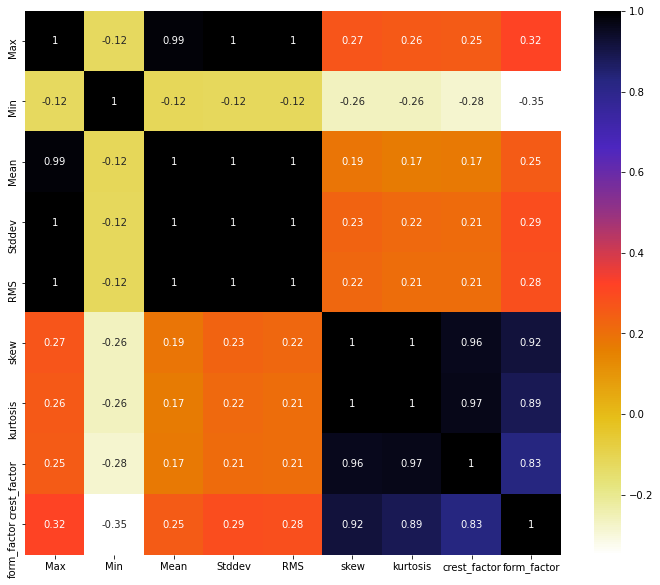

In [32]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

6

In [35]:
corr_features

{'Mean', 'RMS', 'Stddev', 'crest_factor', 'form_factor', 'kurtosis'}

In [36]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [37]:
X_train

,Max,Min,skew
0,-0.409225,-0.358251,1.049095
1,-0.476965,-0.358030,0.946552
2,-0.530255,-0.360266,-1.008467
3,-0.502557,1.372204,-1.073458
4,-0.464715,3.423175,-0.408862
...,...,...,...
3845,-0.504163,1.656725,-0.968966
3846,-0.564435,-0.308724,0.416758
3847,-0.568500,-0.344292,-0.832008
3848,0.641835,-0.334667,-0.854809


In [38]:
y_train

3761     OR021
1362      B021
162       B007
2238     IR014
1918     IR014
         ...  
1896     IR014
4515    Normal
4545    Normal
3950     OR021
1169      B021
Name: fault, Length: 3850, dtype: object

In [39]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [40]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)

In [41]:
tuned_svm_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [42]:
tuned_svm_clf.best_score_

0.8633766233766235

In [43]:
tuned_svm_clf.best_params_

{'C': 500, 'gamma': 0.5, 'kernel': 'rbf'}

In [44]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=500, gamma=0.5)

In [45]:

test_predictions = best_clf.predict(X_test)

In [46]:

test_confu_matrix = confusion_matrix(y_test, test_predictions)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, test_predictions)
print(cm)
accuracy_score(y_test, test_predictions)

[[73  0  1  0  0  0  0  0  1  0]
 [ 5 47 15  0  0  0  0  0  7  1]
 [ 5  6 57  0  0  1  0  0  0  6]
 [ 0  0  0 75  0  0  0  0  0  0]
 [ 0  0  0  0 75  0  0  0  0  0]
 [ 0  0  0  0  0 67  0  1  0  7]
 [ 0  0  0  0  0  0 75  0  0  0]
 [ 0  0  0  0  0  3  0 67  0  5]
 [ 3  5  0  0  0  0  0  0 67  0]
 [ 0  1  7  5  0  7  0  8  0 47]]


0.8666666666666667

In [48]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']


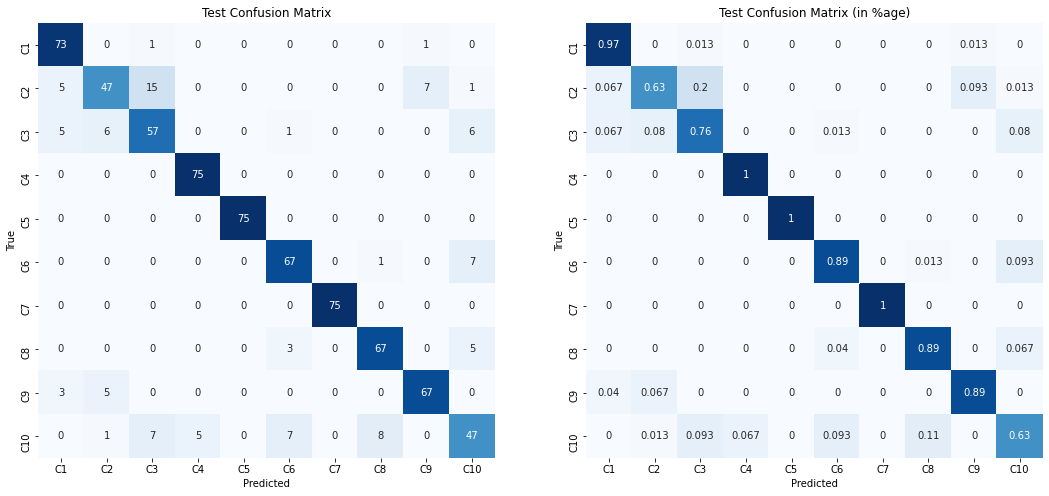

In [49]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
overall_test_accuracy = accuracy_score(y_test, test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.8666666666666667
